In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
scan_results_files = [
    '2023-06-18_18-09-23_results.json',
    '2023-06-18_18-24-20_results.json',
    '2023-06-19_00-25-36_results.json',
    '2023-06-19_15-04-48_results.json',
]

In [23]:
d6_results = []
for filename in scan_results_files:
    with open(f'../results/{filename}') as f:
        data = json.load(f)
        
        configs = data[0]['configs']
        if configs['depth'] == 6:
            d6_results.append(data)
        else:
            continue
            # print to d7 results

In [24]:
best_mapes = {
    'OBJ1': 0.0097,
    'OBJ2': 0.018,
    'OBJ3': 0.013,
    'OBJ4': 0.058,
    'OBJ5': 0.041,
    'OBJ6': 0.040,
}

In [34]:
def learning_rate_to_xval(learning_rate):
    learning_rate = round(learning_rate, 4)
    if learning_rate == 0.001:
        return -1
    elif learning_rate == 0.003:
        return -0.33
    elif learning_rate == 0.005:
        return 0.333
    elif learning_rate == 0.01:
        return 1
    
def learning_rate_to_color(learning_rate):
    learning_rate = round(learning_rate, 4)
    if learning_rate == 0.001:
        return 'r'
    elif learning_rate == 0.003:
        return 'orange'
    elif learning_rate == 0.005:
        return 'g'
    elif learning_rate == 0.01:
        return 'b'

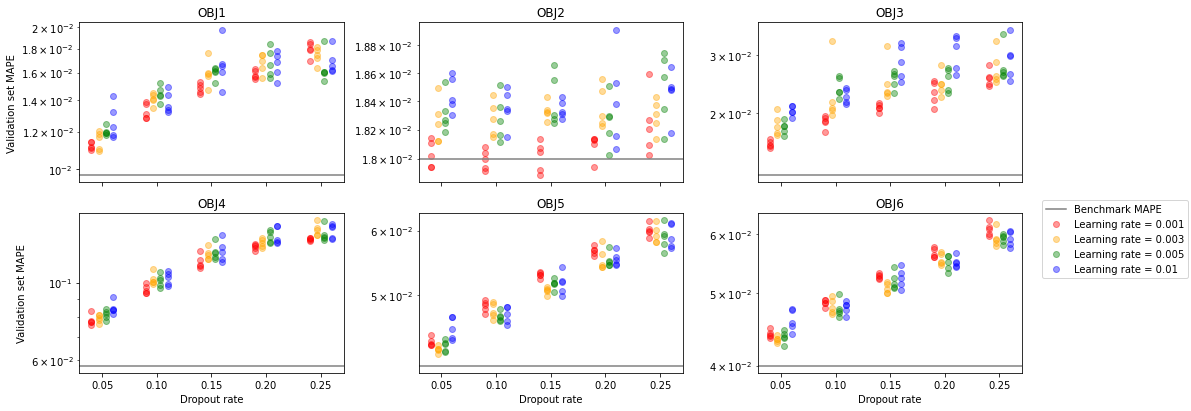

In [39]:
results_list = d6_results

fig, axs = plt.subplots(2, 3, figsize=(18, 6), sharex=True)

# fig.supylabel('Validation set MAPE')
for i in range(1, 7):
    ax = axs.flatten()[i-1]
    ax.axhline(best_mapes[f'OBJ{i}'], label=('Benchmark MAPE' if i == 1 else ''), color='gray')
    ax.set_title(f'OBJ{i}')
    ax.set_xlabel('Dropout rate' if i > 3 else '')
    ax.set_ylabel('Validation set MAPE' if i % 3 == 1 else '')
    ax.set_yscale('log')
    #ax.set_ylim(0.0099, 0.5)

for res in results_list:
    for j, d in enumerate(res):
        configs = d['configs']
        results = d['results']
        dropout_rate = configs['dropout_rate']
        learning_rate = configs['learning_rate']
        
        for i in range(1, 7):
            ax = axs.flatten()[i-1]

            obj_results = results['by_response'][f'OBJ{i}']
            mape_val = obj_results['mape_val']

            ax.scatter(
                [dropout_rate + learning_rate_to_xval(learning_rate)*0.01]*5,
                mape_val, color=learning_rate_to_color(learning_rate), alpha=0.4, 
                label=(f'Learning rate = {round(learning_rate, 4)}' if (j == 0 and i == 1) else ''))

fig.tight_layout(rect=[0, 0.03, 0.8, 1.])
#fig.suptitle(f"Width {configs['width']}, depth {configs['depth']}, sigmoid activation, 1024 batch size ")
fig.legend(loc='upper left', bbox_to_anchor=(.8, 0.5))


plt.savefig('../img/dropout_results_placeholder.png', dpi=500)
plt.show()